# Which Anime Should You Watch?

## Eric Wagner

## Introduction

   Anime, a style of Japanese film and television animation, typically aimed at adults as well as children, has steadily grown in popularity in other parts of the world over the past few decades. This was especially true recently, after the Covid-19 pandemic, where [google trends](https://trends.google.com/trends/explore?date=today%205-y&q=anime) interest for the term nearly doubled in 2020. With so many new fans, who haven’t seen may series, and discussion tending to focus on the newly releasing series, it can be hard to find out which series are the most critically praised overall.
    
The best resource we can use to extract data related to this, would be the social networking website 
   [MyAnimeList](https://myanimelist.net/). MyAnimeList offers a list system for Anime organized based on user review scores. In this project I will separate, visualize, and analyze this list to draw conclusions about and try to predict the quality of a series.

## Data Collection

    I will now import the necessary libraries to complete this tutorial

In [493]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
pd.options.mode.chained_assignment = None
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

This list as already been extracted for us from MyAnimeList and is publicly available on [Kaggle](https://www.kaggle.com/CooperUnion/anime-recommendations-database).
    
We will use pandas to read the .csv

In [472]:
anime = pd.read_csv("anime.csv")
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Since most anime are direct adaptations of some manga series (Japanese graphic novel), I will also be importing and looking at the data from the top 1000 rated manga, also listed on my anime list.

This data has also already been extracted for us and is available on [kaggle](https://www.kaggle.com/astronautelvis/top-1000-ranked-mangas-by-myanimelist).

In [473]:
manga = pd.read_csv("top_1000.csv")
manga.head()

,Unnamed: 0,Title,Title_Synonym,Title_Japanese,Status,Volumns,Chapters,Publishing,Rank,Score,Scored_by,Popularity,Memebers,Favorites,Synopsis,Publish_period,Genre
0,0,Berserk,Berserk,ベルセルク,Publishing,unkown,unkown,True,1,9.39,201756,2,427894,80308,"Guts, a former mercenary now known as the ""Bla...","Aug 25, 1989 to present","'Action', 'Adventure', 'Demons', 'Drama', 'Fan..."
1,1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,unkown,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,Finished,24.0,96.0,False,2,9.23,94427,29,160782,27459,"In the American Old West, the world's greatest...","Jan 19, 2004 to Apr 19, 2011","'Action', 'Adventure', 'Mystery', 'Historical'..."
2,2,One Piece,One Piece,ONE PIECE,Publishing,unkown,unkown,True,3,9.15,249936,3,410522,82310,"Gol D. Roger, a man referred to as the ""Pirate...","Jul 22, 1997 to present","'Action', 'Adventure', 'Comedy', 'Fantasy', 'S..."
3,3,Vagabond,Vagabond,バガボンド,On Hiatus,37.0,327.0,False,4,9.13,72613,19,211345,21596,"In 16th century Japan, Shinmen Takezou is a wi...","Sep 3, 1998 to May 21, 2015","'Action', 'Adventure', 'Drama', 'Historical', ..."
4,4,Monster,Monster,MONSTER,Finished,18.0,162.0,False,5,9.10,57801,33,148764,13049,"Kenzou Tenma, a renowned Japanese neurosurgeon...","Dec 5, 1994 to Dec 20, 2001","'Mystery', 'Drama', 'Psychological', 'Seinen'"


## Tidying the Data
    Because we have over 12,000 entries, we can significantly cut down the data to draw more accurate conclusions. First, we will remove the entries classified as Movie or OVA as they are mostly supplemental material to existing series.
    
    We will also only be looking at series which have a corresponding manga of the same name in the manga table. This allows us to find out new information such as the age of the source material. Also, the success of an ongoing manga can predict the future content and success of an anime.
    
    Upon merging, we remove entries with duplicate names, caused by a series having both a newer and older anime adaptation. This can inflate the entries for more popular and highly rated series
    
    Next, we remove the columns with duplicate or irrelevant information and rename the columns reflecting popularity and ratings to make the data more readable.
    
    I noticed some of the entries we were left with had missing values in the Anime_Score column. After removing this we are left with 243 entries that we are interested in.
    

In [474]:
manga = pd.read_csv("top_1000.csv")
manga = manga.rename(columns={"Title":"name"})
ani = pd.merge(anime,manga, on="name")
ani = ani.drop_duplicates(subset=['name'])
ani = ani.loc[ani["type"]=="TV"]
ani = ani.drop(columns=['Unnamed: 0', 'Title_Synonym', 'Title_Japanese', 'anime_id', 'Volumns',
                        'Rank','Genre','Synopsis','Popularity','Scored_by', 'Favorites', 'Publishing'])
ani = ani.rename(columns={"members": "Anime_Popularity", "Memebers": "Manga_Popularity", 
                   "rating": "Anime_Score", "Score": "Manga_Score"})
ani = ani.drop(ani.index[[243,244,245,246,247,248,249]])
ani.head()

,name,genre,type,episodes,Anime_Score,Anime_Popularity,Status,Chapters,Manga_Score,Manga_Popularity,Publish_period
1,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Finished,17.0,8.47,8851,"Jun 30, 2011 to May 31, 2012"
6,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376,Finished,709.0,8.59,77732,"Dec 8, 2003 to Jun 20, 2019"
7,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397,Finished,44.0,8.62,66115,"Apr 6, 2011 to Feb 6, 2015"
10,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151,Finished,28.0,7.98,3553,"Apr 28, 2007 to Mar 1, 2008"
11,Hajime no Ippo,"Comedy, Drama, Shounen, Sports",TV,75,8.83,157670,Publishing,unkown,8.67,60661,"Sep 27, 1989 to present"


    This list may see less valuable now as many of the top-rated series have been removed, however reducing the data in this way will give us more uniform data to draw conclusions from.

## Data Visualization and Analysis
In order to draw information from this data I first chose to use seaborn to plot [regression](https://en.wikipedia.org/wiki/Regression_analysis) models to see what had the biggest effect on an animes success
    
First I plotted the animes score and popularity.

AxesSubplot(0.125,0.125;0.775x0.755)
0.46631314049656414


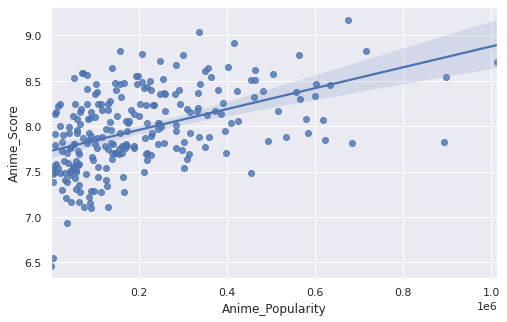

In [475]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ani['Anime_Score'],ani['Anime_Popularity'])
print(sns.regplot(x="Anime_Popularity",y="Anime_Score",data=ani))
print(r_value)

    This shows an expected positive correlation between a series popularity and rating. I also printed the correlation coefficient to get an idea of how well the data can predict values given one of the two attributes. Since the coefficient was only 0.466, not very close to 1, we will explore other regressions.

    To check for a correlation between anime and manga, I decided to make a similar plot but for the popularity of the given manga instead of anime.

AxesSubplot(0.125,0.125;0.775x0.755)
0.4509364936227405


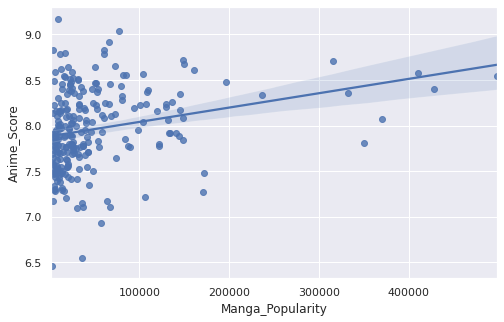

In [476]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ani['Manga_Score'],ani['Manga_Popularity'])
print(sns.regplot(x="Manga_Popularity",y="Anime_Score",data=ani))
print(r_value)

    This provides a similar graph except that the data is more centralized around less popular entries. This makes sense as manga series more prevalent and easier to produce than anime so many series remain unpopular until they get an anime.
    
    Despite this, the correlation coefficient, being 0.4509, was very similar to the one for anime popularity, suggesting and strong correlation between anime and manga.
    
    To show this, I choose to plot the score of a series' anime vs manga.

AxesSubplot(0.125,0.125;0.775x0.755)
0.5581690744429807


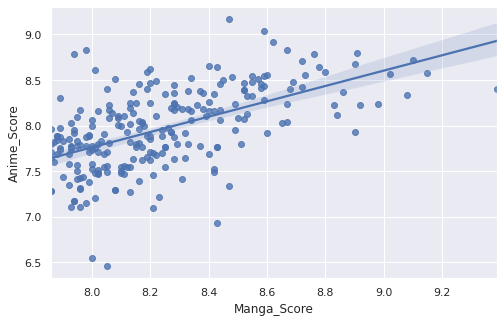

In [477]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ani['Anime_Score'],ani['Manga_Score'])
print(sns.regplot(x="Manga_Score",y="Anime_Score",data=ani))
print(r_value)

    The graph provides a greater correlation coefficient, and a closer linear relation than the previous two. This suggests the best single value to predict an anime rating is its manga rating. 

    I will now explore the effect of other variables on review score.

    
    The genres are provided as comma seperated values so I first used the split command to extract each genre and store them as a list, and then the explode command to add a repeat entry for each series for each genre it falls under. This will allow us to have more detailed and accurate graphs. 

In [478]:
ani['genre'] = ani['genre'].str.split(', ')
anig = ani.explode('genre')
anig.head()

,name,genre,type,episodes,Anime_Score,Anime_Popularity,Status,Chapters,Manga_Score,Manga_Popularity,Publish_period
1,Steins;Gate,Sci-Fi,TV,24,9.17,673572,Finished,17.0,8.47,8851,"Jun 30, 2011 to May 31, 2012"
1,Steins;Gate,Thriller,TV,24,9.17,673572,Finished,17.0,8.47,8851,"Jun 30, 2011 to May 31, 2012"
6,Gintama,Action,TV,201,9.04,336376,Finished,709.0,8.59,77732,"Dec 8, 2003 to Jun 20, 2019"
6,Gintama,Comedy,TV,201,9.04,336376,Finished,709.0,8.59,77732,"Dec 8, 2003 to Jun 20, 2019"
6,Gintama,Historical,TV,201,9.04,336376,Finished,709.0,8.59,77732,"Dec 8, 2003 to Jun 20, 2019"


To show the effect of genre, I chose to create a [violin plot](https://en.wikipedia.org/wiki/Violin_plot) to see the distribution of reviews for some of the most popular genres.

<AxesSubplot:xlabel='genre', ylabel='Anime_Score'>

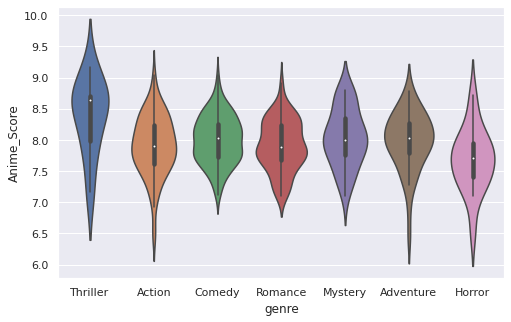

In [479]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.violinplot(data=anig[anig['genre'].isin(['Action', 'Thriller', 'Comedy', 'Romance','Mystery','Adventure','Horror'])],
               x='genre', y='Anime_Score')

    This shows that review scores for different series tend to center around an 8.0 score, however they do vary to some extend based on their genre.
    This data can reflect the young and male audience of anime, liking adventure more than romance, but also limitations of the medium, struggling to portray horror as well as a live action show.

    Next I will be looking at how the year a manga was published effects an animes review score
    
    Because the publish time is provided as a date we must extract the year to graph the year as a number
    
    Some entries gave the publish time in a differnt format, so we had to drop the entries that ended up with nan values

In [480]:
ani["Publish_period"] = ani["Publish_period"].str.split(',').str[1]
ani["Publish_period"] = ani["Publish_period"].str.slice(stop=5)
ani = ani.dropna()
ani['Publish_period'] = pd.to_numeric(ani['Publish_period'])

    I will now plot the values in a scatter plot to see a potential relationship

<AxesSubplot:xlabel='Publish_period', ylabel='Anime_Score'>

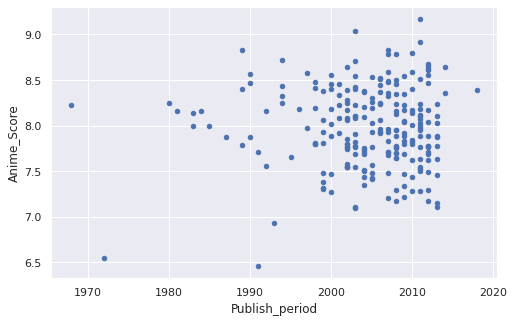

In [481]:
ani.plot.scatter(x="Publish_period",y="Anime_Score")

    There seems to be little to no relationship between release date and review score so we will not look that this value   any longer

    Next I will look into the relation ship between the number of episdoes and the score of the show 
    
    Because we have some missing data here, we first have to reduce our data set

In [482]:
aniep = ani.loc[ani['episodes'] != 'Unknown']
aniep['episodes'] = pd.to_numeric(aniep['episodes'])

<AxesSubplot:xlabel='episodes', ylabel='Anime_Score'>

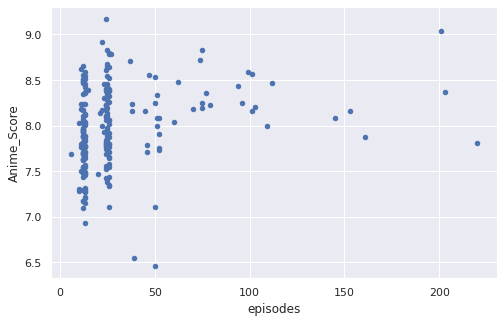

In [483]:
aniep.plot.scatter(x="episodes",y="Anime_Score")

        This most noticealbe thing about this data is how the epiodes are centered around 12 and 24. That is because those are the typical lengths of seasons for anime.
        
        Based on this plot there does seem to be a slight positive linear relationship so I will go ahead and map the       regression plot

AxesSubplot(0.125,0.125;0.775x0.755)
0.2345639778963854


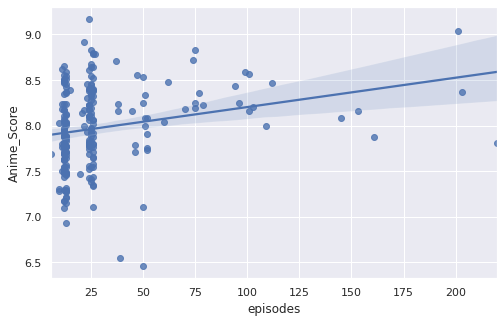

In [484]:
slope, intercept, r_value, p_value, std_err = stats.linregress(aniep['Anime_Score'],aniep['episodes'])
print(sns.regplot(x="episodes",y="Anime_Score",data=aniep))
print(r_value)

    With a correlation coefficent of only 0.2345, a correlation is definitly present. However, we should likely not use this data to predict any values as it is not the best fit for the data and we are practically more intersted in predicting the quality of series that havent gotten as many episodes yet, as longer series are already more discussed and reviewed on the internet.

       Another piece of data that we can draw form this table is the pacing of a given anime. Diferent portions of differnt manga have been animated but we may be able to see some trend when we compare chapters/episodes and review scores

In [485]:
aniep = aniep.loc[aniep['Chapters'] != 'unkown']
aniep['Chapters'] = pd.to_numeric(aniep['Chapters'])

In [486]:
aniep["pacing"] = aniep["Chapters"]/aniep["episodes"]
aniep.head()

,name,genre,type,episodes,Anime_Score,Anime_Popularity,Status,Chapters,Manga_Score,Manga_Popularity,Publish_period,pacing
1,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572,Finished,17.0,8.47,8851,2011,0.708333
6,Gintama,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,201,9.04,336376,Finished,709.0,8.59,77732,2003,3.527363
7,Shigatsu wa Kimi no Uso,"[Drama, Music, Romance, School, Shounen]",TV,22,8.92,416397,Finished,44.0,8.62,66115,2011,2.000000
10,Code Geass: Hangyaku no Lelouch,"[Action, Mecha, Military, School, Sci-Fi, Supe...",TV,25,8.83,715151,Finished,28.0,7.98,3553,2007,1.120000
12,Monogatari Series: Second Season,"[Comedy, Mystery, Romance, Supernatural, Vampire]",TV,26,8.80,205959,Finished,199.0,8.91,17057,2010,7.653846


AxesSubplot(0.125,0.125;0.775x0.755)
-0.22291818891579643


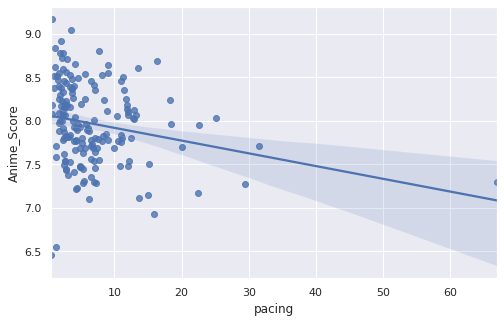

In [487]:
slope, intercept, r_value, p_value, std_err = stats.linregress(aniep['Anime_Score'],aniep['pacing'])
print(sns.regplot(x="pacing",y="Anime_Score",data=aniep))
print(r_value)

    This did not proove to be an effective predictor of review score. The disparity of the pacing from partially completed series, and a correlation coefficient of -0.22 makes the data too difficult to draw any conclutions from

## Regression Anlaysis
I will now apply [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) linear regression from scikit learn to predict an animes review score based on the mangas score and genres

First, I fit a regression to the manga score and all of the genres. This would be hard to use to predict values because it expects a parameter for every genre. However, by using the sort_values() command I am able to rank the genres of anime by their relation to review score.

In [488]:
reg = linear_model.LinearRegression()
X = pd.get_dummies(data=anig[['Manga_Score', 'genre']])
y = anig['Anime_Score']
reg.fit(X, y)
coeff_parameter = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_parameter = coeff_parameter.sort_values(by =['Coefficient'])
coeff_parameter

,Coefficient
genre_Shoujo Ai,-0.406784
genre_Horror,-0.304419
genre_Shounen Ai,-0.299860
genre_Kids,-0.275771
genre_Harem,-0.165987
genre_Military,-0.148066
genre_Shoujo,-0.092842
genre_Vampire,-0.091262
genre_Demons,-0.088646
genre_Magic,-0.087957


    This list can provide insight on what genres of anime are expected to be succesful and give someone ideas of type of series they may want to look into.
    
    I will now fit a new regression with 6 popular genres, and other relevant data including popularity, in order to judge the accuracy of the prediction.

In [489]:
ani_reg = anig[anig['genre'].isin(['Thriller', 'Action', 'Comedy', 'Adventure','Horror','Romance'])]
X = pd.get_dummies(data=ani_reg[['Anime_Popularity','Manga_Score', 'genre']])
y = ani_reg['Anime_Score']
reg.fit(X, y)
coeff_parameter = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
Anime_Popularity,8.595562e-07
Manga_Score,6.943989e-01
genre_Action,-4.109084e-02
genre_Adventure,-2.018277e-02
genre_Comedy,1.145609e-01
genre_Horror,-2.838110e-01
genre_Romance,3.030534e-02
genre_Thriller,2.002184e-01


    Now, lets test our regression of series from the original table.
    
    Lets predict the score of Hajime no Ippo, a comedy with an 8.67 manga rating and 157670 reviews

In [490]:
reg.predict([[157670,8.67, 0,0,1,0,0,0]])

array([8.27812719])

    The real review score of Hajime no Ippos anime is an 8.83. so the model is only somewhat accurate
    
    This is likely becuase Hajime no Ippo is a very old and popular series, with an inflated rating. Lets test a series from the middle of the list: Ajin

In [491]:
reg.predict([[160972,7.93, 1,0,0,0,0,0]])

array([7.61145853])

   Now our prediction was much closer with a 7.611 when the real score is a 7.78
   
   I will now print the models coefficient of determination to have a better idea of the accuracy of the model

In [492]:
reg.score(X, y)

0.46829346998956956

    Since the model has a score of 0.4682 it is somewhat accurate at predicting review score

## Conclusions
We have been able to draw many conclutions about what leads to an anime receiving a high review score.

    1. Manga Scores have the strongest correlation to and animes scores of any value
    2. Genres have a slight but valuble correlation to the score of an anime
    3. The popularity of a series, both as anime and manga have a positive correlation to the review score of a series
    4. The age of an anime does not have a noticable correlation to the score of an anime
    5. Anime with more episodes tend to have higher review scores
This is quite informative information when trying to make sense of the reviews on MyAnimeList. Knowing that the review score is reflective of the popularity, genre, and manga reviews of a series you can consider all of these things when looking at the list for a new series to watch. Also the ranking of the reviews of genres and be useful when trying to find a series to watch. Many people may not expect Historical or Comedy to be a perfered genre related to the reviews for an anime, and it may encourage them to try something new.